1. What is Boosting in Machine Learning
- Boosting is an ensemble technique that combines multiple weak learners (usually decision trees) to form a strong predictor. It builds models sequentially, where each new model focuses on correcting errors made by the previous ones. The idea is to minimize bias and variance, improving overall accuracy. Boosting gives more weight to misclassified points at each iteration, making it powerful for complex tasks.



2. How does Boosting differ from Bagging?
- Boosting builds models sequentially, with each model correcting the errors of its predecessor, and focuses on hard-to-classify points. Bagging, on the other hand, trains models in parallel on different random samples (with replacement) and averages their outputs to reduce variance. Boosting reduces bias and variance; bagging mainly reduces variance. Boosting gives higher weight to difficult cases, whereas bagging treats all instances equally.



3. What is the key idea behind AdaBoost?
- The key idea behind AdaBoost (Adaptive Boosting) is to combine weak learners iteratively so that each new model focuses more on the data points that were misclassified by previous models. It assigns higher weights to difficult instances, forcing the next learner to try harder on these. The final prediction is a weighted vote of all weak learners, resulting in a strong classifier.

4. Explain the working of AdaBoost with an example.
In AdaBoost, we start with equal weights for all training samples. A weak learner (e.g., decision stump) is trained and its errors are calculated. Weights of misclassified points are increased, and a new weak learner is trained on this updated data. This process repeats, focusing more on hard-to-classify points each time. The final output combines the weak learners' votes, weighted by their accuracy. For example, in spam detection, weak learners might focus on different word patterns.



5. What is Gradient Boosting, and how is it different from AdaBoost?
- Gradient Boosting builds models sequentially, but instead of adjusting weights directly like AdaBoost, it fits each new learner to the negative gradient of the loss function (the residual errors). This means it performs gradient descent to minimize loss. While AdaBoost adjusts weights to focus on misclassified points, Gradient Boosting optimizes a specific loss function (e.g., squared error) using gradient methods.

6. What is the loss function in Gradient Boosting?
- Gradient Boosting can work with various loss functions, depending on the task. For regression, it commonly uses mean squared error (MSE) or mean absolute error (MAE). For classification, it often uses log-loss (for binary classification) or multi-class log-loss. The choice of loss function guides how residuals (errors) are computed and how the next weak learner is fit during training.



7. How does XGBoost improve over traditional Gradient Boosting?
- XGBoost (Extreme Gradient Boosting) enhances traditional Gradient Boosting by introducing regularization (to reduce overfitting), using parallel processing, tree pruning, and efficient handling of sparse data. It employs second-order derivatives for more accurate gradient estimates and includes features like early stopping and built-in cross-validation. These improvements make XGBoost faster, more accurate, and scalable for large datasets.

8. What is the difference between XGBoost and CatBoost?
- XGBoost is optimized for speed, regularization, and scalability, but it needs preprocessing for categorical features (like one-hot encoding). CatBoost is specifically designed to handle categorical variables natively and efficiently, without preprocessing. CatBoost also reduces prediction shift and overfitting through ordered boosting and advanced encoding techniques, making it especially strong for datasets with many categorical features.



9. What are some real-world applications of Boosting techniques?
Boosting techniques are widely used in real-world applications like fraud detection (credit card fraud), spam email classification, customer churn prediction, click-through rate prediction in ads, risk modeling in insurance, and ranking problems in search engines. They are favored in machine learning competitions and practical deployments for their accuracy and ability to handle complex, noisy data.



10. How does regularization help in XGBoost?
- Regularization in XGBoost helps prevent overfitting by penalizing overly complex models (trees with too many splits or leaf nodes). XGBoost applies L1 (lasso) and L2 (ridge) regularization to the model's objective function, discouraging unnecessary complexity while maintaining accuracy. This allows the model to generalize better to unseen data and improves robustness, especially when working with noisy datasets.



11. What are some hyperparameters to tune in Gradient Boosting models?
- Key hyperparameters in Gradient Boosting include learning rate (controls step size at each iteration), number of estimators (trees), max depth (tree depth), min samples split/leaf (controls tree growth), subsample (fraction of data used for each tree), and loss function type. Tuning these helps balance bias-variance trade-off, training time, and model performance.



12. What is the concept of Feature Importance in Boosting?
- Feature importance in Boosting refers to ranking features based on their contribution to the model's predictive performance. It's usually computed from how often and how effectively a feature is used in splitting the data across all trees. Features that contribute to significant reductions in the loss function across many trees are ranked as more important. This helps in feature selection and model interpretability.

13. Why is CatBoost efficient for categorical data?
- CatBoost is efficient for categorical data because it natively processes categorical variables without the need for manual encoding (like one-hot encoding). It uses techniques like target statistics and ordered boosting to transform categories while preventing data leakage. This approach handles high-cardinality categories well, improves accuracy, and reduces training time compared to traditional encoding methods.



In [ ]:
#14.Train an AdaBoost Classifier on a sample dataset and print model accuracy?
from sklearn.datasets import make_classification
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate synthetic binary classification data
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10,
                           n_redundant=5, random_state=42)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize AdaBoost classifier
model = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")


Model Accuracy: 0.8467


Mean Absolute Error (MAE): 47.63


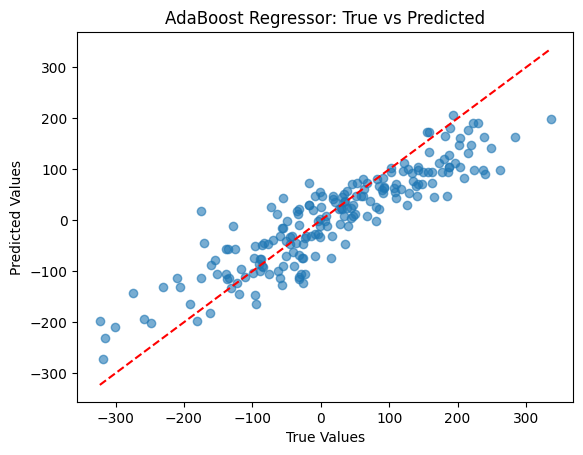

In [2]:
#15. Train an AdaBoost Regressor and evaluate performance using Mean Absolute Error (MAE) ?
# Import libraries
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Generate sample regression dataset
X, y = make_regression(n_samples=1000, n_features=10, noise=10, random_state=42)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize AdaBoost Regressor
model = AdaBoostRegressor(n_estimators=100, learning_rate=0.5, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance using Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Optional: plot true vs predicted values
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("AdaBoost Regressor: True vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


Test Accuracy: 0.9561

Feature Importances:
                    Feature  Importance
7       mean concave points    0.450528
27     worst concave points    0.240103
20             worst radius    0.075589
22          worst perimeter    0.051408
21            worst texture    0.039886
23               worst area    0.038245
1              mean texture    0.027805
26          worst concavity    0.018725
16          concavity error    0.013068
13               area error    0.008415
10             radius error    0.006870
24         worst smoothness    0.004811
19  fractal dimension error    0.004224
11            texture error    0.003604
5          mean compactness    0.002996
15        compactness error    0.002511
4           mean smoothness    0.002467
17     concave points error    0.002038
28           worst symmetry    0.001478
12          perimeter error    0.001157
6            mean concavity    0.000922
18           symmetry error    0.000703
14         smoothness error    0.000

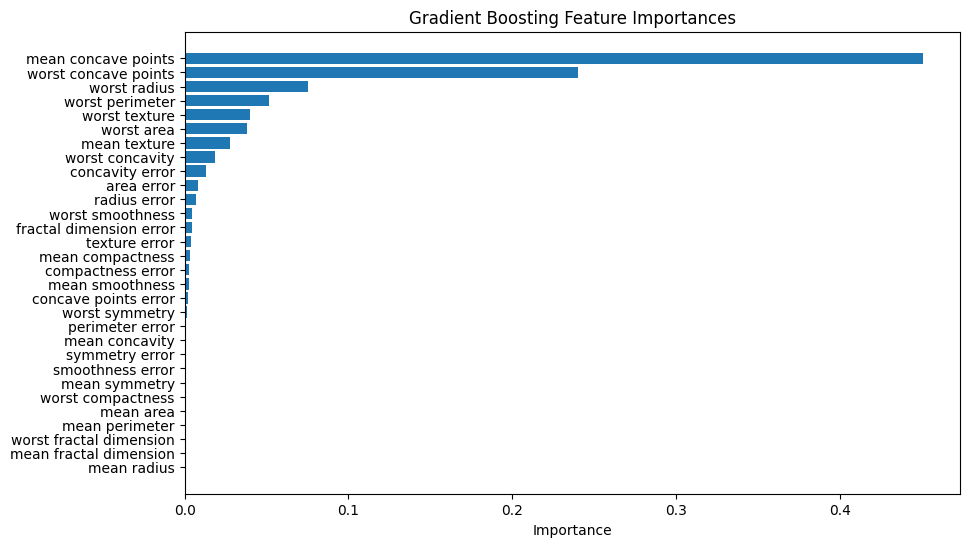

In [3]:
#16. Train a Gradient Boosting Classifier on the Breast Cancer dataset and print feature importance ?
# Import libraries
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt

# Load Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Initialize and train Gradient Boosting Classifier
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Predict and print accuracy
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc:.4f}")

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for better display
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Print feature importances
print("\nFeature Importances:")
print(importance_df)

# Optional: plot feature importances
plt.figure(figsize=(10,6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel("Importance")
plt.title("Gradient Boosting Feature Importances")
plt.gca().invert_yaxis()
plt.show()


R-squared Score: 0.9166


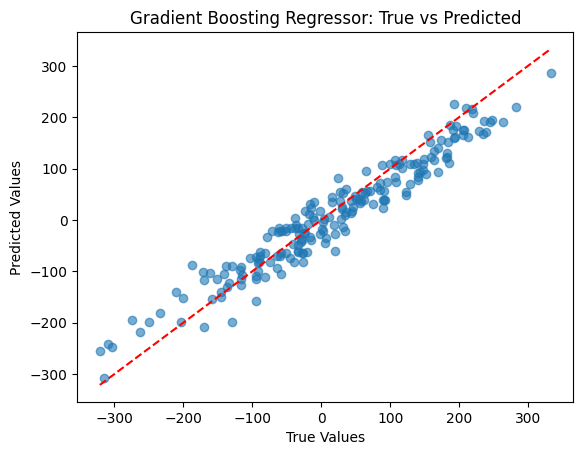

In [4]:
#17. Train a Gradient Boosting Regressor and evaluate using R-Squared Score ?
# Import libraries
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Generate sample regression dataset
X, y = make_regression(n_samples=1000, n_features=10, noise=15, random_state=42)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Initialize and train Gradient Boosting Regressor
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate using R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2:.4f}")

# Optional: plot true vs predicted values
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Gradient Boosting Regressor: True vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


In [9]:
#18.Train an XGBoost Classifier on a dataset and compare accuracy with Gradient Boosting ?
# Install XGBoost (if not installed)
!pip install xgboost

# Import libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# Load Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
gb_acc = accuracy_score(y_test, gb_pred)

# XGBoost Classifier
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_acc = accuracy_score(y_test, xgb_pred)

# Print accuracy comparison
print(f"Gradient Boosting Classifier Accuracy: {gb_acc:.4f}")
print(f"XGBoost Classifier Accuracy: {xgb_acc:.4f}")





XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [ ]:
#19.Train a CatBoost Classifier and evaluate using F1-Score?
# Install CatBoost if not already installed
!pip install catboost

# Import libraries
from catboost import CatBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Train CatBoost Classifier
cat_model = CatBoostClassifier(verbose=0, random_seed=42)
cat_model.fit(X_train, y_train)

# Predict
y_pred = cat_model.predict(X_test)

# Evaluate using F1-Score
f1 = f1_score(y_test, y_pred)
print(f"CatBoost Classifier F1-Score: {f1:.4f}")


In [13]:
#20.Train an XGBoost Regressor and evaluate using Mean Squared Error (MSE)?
# Install XGBoost if not already installed
!pip install xgboost

# Import libraries
from xgboost import XGBRegressor
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load dataset (Diabetes dataset ek common regression dataset hai)
data = load_diabetes()
X = data.data
y = data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Train XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict
y_pred = xgb_model.predict(X_test)

# Evaluate using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"XGBoost Regressor Mean Squared Error (MSE): {mse:.4f}")


In [ ]:
#21.Train an AdaBoost Classifier and visualize feature importance?
# Import libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Train AdaBoost Classifier
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_model.fit(X_train, y_train)

# Predict
y_pred = ada_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"AdaBoost Classifier Accuracy: {acc:.4f}")

# Feature Importance
importances = ada_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(10, 6))
plt.title("AdaBoost Feature Importances")
plt.bar(range(X.shape[1]()


In [ ]:
#22.Train a Gradient Boosting Regressor and plot learning curves?
# Import libraries
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load dataset
data = load_diabetes()
X = data.data
y = data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Train Gradient Boosting Regressor with staged prediction for learning curves
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

# Collect MSE at each stage
train_mse = []
test_mse = []

for y_train_pred, y_test_pred in zip(gb_model.staged_predict(X_train), gb_model.staged_predict(X_test)):
    train_mse.append(mean_squared_error(y_train, y_train_pred))
    test_mse.append(mean_squared_error(y_test, y_test_pred))

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_mse, label='Training MSE')
plt.plot(test_mse, label='Test MSE')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Squared Error')
plt.title('Gradient Boosting Regressor Learning Curves')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#23.Train an XGBoost Classifier and visualize feature importance?
# Install XGBoost if not installed
!pip install xgboost

# Import libraries
from xgboost import XGBClassifier, plot_importance
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Train XGBoost Classifier
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = xgb_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"XGBoost Classifier Accuracy: {acc:.4f}")

# Plot feature importance
plt.figure(figsize=(10, 6))
plot_importance(xgb_model, max_num_features=10, importance_type='weight')
plt.title("XGBoost Feature Importance (Top 10 Features)")
plt.show()


In [ ]:
#24.Train a CatBoost Classifier and plot the confusion matrix?
# Install CatBoost if not installed
!pip install catboost

# Import libraries
from catboost import CatBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Train CatBoost Classifier
cat_model = CatBoostClassifier(verbose=0, random_seed=42)
cat_model.fit(X_train, y_train)

# Predict
y_pred = cat_model.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"CatBoost Classifier Accuracy: {acc:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("CatBoost Classifier Confusion Matrix")
plt.show()


In [ ]:
#25.Train an AdaBoost Classifier with different numbers of estimators and compare accuracy?
# Import libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Different n_estimators
estimators_list = [10, 50, 100, 200]
accuracy_list = []

# Train and evaluate
for n in estimators_list:
    model = AdaBoostClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_lis_


In [ ]:
#26. Train a Gradient Boosting Classifier and visualize the ROC curve?
# Import libraries
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Train Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

# Predict probabilities
y_prob = gb_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Print accuracy
y_pred = gb_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Gradient Boosting Classifier Accuracy: {acc:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting Classifier ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [ ]:
#27. Train an XGBoost Regressor and tune the learning rate using GridSearchCV?
# Install XGBoost if not installed
!pip install xgboost

# Import libraries
from xgboost import XGBRegressor
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

# Load dataset
data = load_diabetes()
X = data.data
y = data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Set up model
xgb_model = XGBRegressor(n_estimators=100, random_state=42)

# Define parameter grid
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3]
}

# Set up GridSearchCV
grid_search_


In [12]:
#28.Train a CatBoost Classifier on an imbalanced dataset and compare performance with class weighting?
# Install CatBoost if not installed
!pip install catboost

# Import libraries
from catboost import CatBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

# Create imbalanced dataset
X, y = make_classification(
    n_samples=1000, n_features=20, n_informative=10, n_redundant=5,
    n_clusters_per_class=1, weights=[0.9, 0.1], flip_y=0, random_state=42
)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Without class weights
model_no_weight = CatBoostClassifier(verbose=0, random_seed=42)
model_no_weight.fit(X_train, y_train)
y_pred_no_weight = model_no_weight.predict(X_test)

acc_no_weight = accuracy_score(y_test, y_pred_no_weight)
f1_no_weight = f1_score(y_test, y_pred_no_weight)
print(f"Without class weights - Accuracy: {acc_no_weight:.4f}, F1-Score: {f1_no_weight:.4f}")

# With class weights
# Calculate class weights manually
from sklearn.utils.class_weight import compute_class_weight
weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(zip(np.unique(y_train), weights))

model_weight = CatBoostClassifier(class_weights=class_weights, verbose=0, random_seed=42)
model_weight.fit(X_train, y_train)
y_pred_weight = model_weight.predict(X_test)

acc_weight = accuracy_score(y_test, y_pred_weight)
f1_weight = f1_score(y_test, y_pred_weight)
print(f"With class weights - Accuracy: {acc_weight:.4f}, F1-Score: {f1_weight:.4f}")


In [ ]:
#29.Train an AdaBoost Classifier and analyze the effect of different learning rates?
# Import libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Different learning rates
learning_rates = [0.01, 0.05, 0.1, 0.5, 1.0]
accuracy_list = []

# Train and evaluate
for lr in learning_rates:
    model = AdaBoostClassifier(
        n_estimators=100,
        learning_rate=lr,
        random_state=42
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_list.append(acc)
    print(f"AdaBoost Accuracy with learning_rate={lr}: {acc:.4f}")

# Plot
plt.figure(figsize=(8, 5))
plt.plot(learning_rates, accuracy_list, marker='o')
plt.xlabel('Learning Rate')
pl


In [ ]:
#30. Train an XGBoost Classifier for multi-class classification and evaluate using log-loss.
# Install XGBoost if not installed
!pip install xgboost

# Import libraries
from xgboost import XGBClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, accuracy_score

# Load multi-class dataset (Iris)
data = load_iris()
X = data.data
y = data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train XGBoost Classifier
xgb_model = XGBClassifier(
    objective='multi:softprob',
    num_class=3,
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)
xgb_model.fit(X_train, y_train)

# Predict probabilities
y_prob = xgb_model.predict_proba(X_test)

# Compute log loss
loss = log_loss(y_test, y_prob)

# Predict classes and compute accuracy
y_pred = xgb_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"XGBoost Multi-class Classifier Accuracy: {acc:.4f}")
print(f"XGBoost Multi-class Log Loss: {loss:.4f}")
